Parte 1: Instalación de librerías necesarias

In [ ]:
!pip install pandas spacy nltk emoji --quiet
!python -m nltk.downloader stopwords
!python -m spacy download es_core_news_sm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 5.8 MB/s eta 0:00:00
<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 87.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Parte 2: Importar librerías y cargar recursos

In [ ]:
import pandas as pd
import re
import emoji
import nltk
import spacy
from nltk.corpus import stopwords
from spacy.lang.es.stop_words import STOP_WORDS as SPACY_STOPWORDS

# Cargar idioma español
nlp = spacy.load("es_core_news_sm")

# Descargar y combinar stopwords
nltk.download('stopwords')
stopwords_es = set(stopwords.words('spanish')).union(SPACY_STOPWORDS)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


 Parte 3: Funciones de limpieza y procesamiento

In [ ]:
def limpiar_texto(texto):
    if pd.isna(texto):
        return ""
    texto = texto.lower()  # Minúsculas
    texto = re.sub(r"http\S+|www\S+|https\S+", "", texto)  # URLs
    texto = emoji.replace_emoji(texto, replace="")  # Eliminar emojis
    texto = re.sub(r"[^\w\s]", "", texto)  # Quitar signos de puntuación
    texto = re.sub(r"\s+", " ", texto).strip()  # Espacios extra
    return texto

def procesar_comentario(texto):
    texto_limpio = limpiar_texto(texto)
    doc = nlp(texto_limpio)
    tokens = [
        token.lemma_ for token in doc
        if token.text not in stopwords_es and not token.is_punct and not token.is_space
    ]
    return " ".join(tokens)


In [ ]:
df = pd.read_csv("videosprueba2_shakira_comentarios_separados.csv")
df.head()

,comentario
0,"señora Shakira usted debería ser presidenta ,e..."
1,hola Shakira si me saludas me desmayó
2,Me aparecía en pleno 2025
3,La sirena más hermosa 🥰🥰
4,La más top de toda la historia


In [ ]:
df["comentario_procesado"] = df["comentario"].apply(procesar_comentario)
df[["comentario", "comentario_procesado"]].head()


,comentario,comentario_procesado
0,"señora Shakira usted debería ser presidenta ,e...",señora shakirar deber presidenta bendeciday in...
1,hola Shakira si me saludas me desmayó,hola shakirar saludar desmayar
2,Me aparecía en pleno 2025,aparecer pleno 2025
3,La sirena más hermosa 🥰🥰,sirena hermoso
4,La más top de toda la historia,top historia


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Usar los comentarios ya procesados
corpus = df["comentario_procesado"].astype(str).tolist()

# Crear vectorizador
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

# Convertir a DataFrame
df_bow = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Mostrar las primeras filas
df_bow.head()


,10,1k,20,2020,2021,2025,2050,23,247,26,...,وجمالها,وحافظو,وقت,وين,ويوم,يالطيف,يذكركم,يصرالي,يعني,သပရတသတကအငအတပညလနတ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/tmp/ipython-input-8-68365519.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencias.head(top_n).values, y=frecuencias.head(top_n).index, palette="viridis")


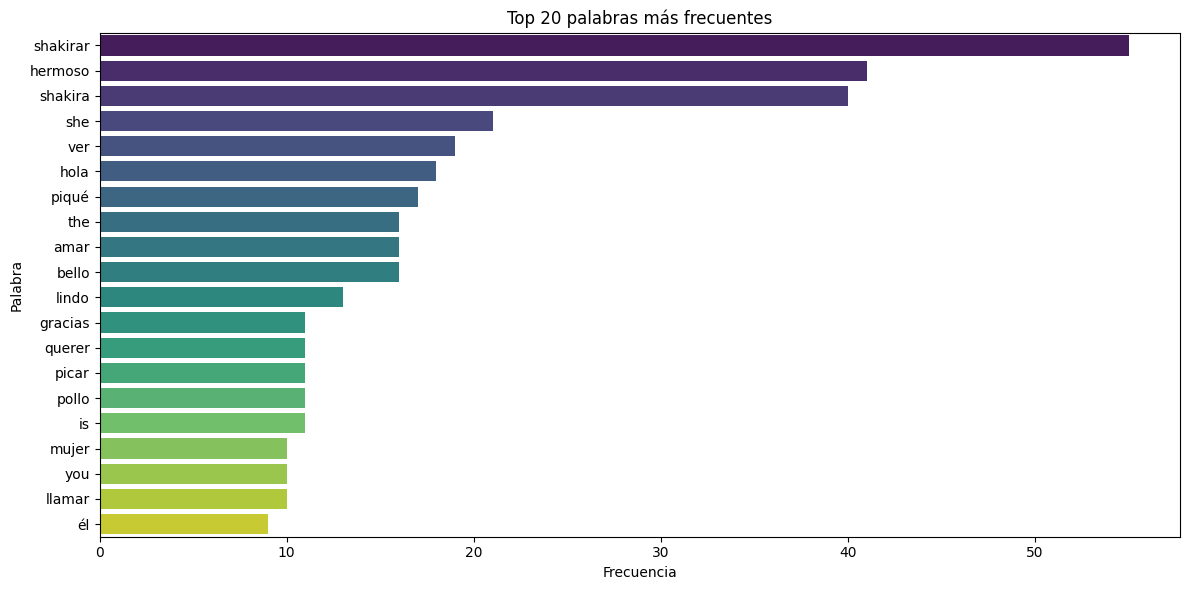

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sumar las frecuencias de cada palabra en todo el corpus
frecuencias = df_bow.sum().sort_values(ascending=False)

# Mostrar las 20 palabras más frecuentes
top_n = 20
plt.figure(figsize=(12, 6))
sns.barplot(x=frecuencias.head(top_n).values, y=frecuencias.head(top_n).index, palette="viridis")
plt.title("Top 20 palabras más frecuentes")
plt.xlabel("Frecuencia")
plt.ylabel("Palabra")
plt.tight_layout()
plt.show()


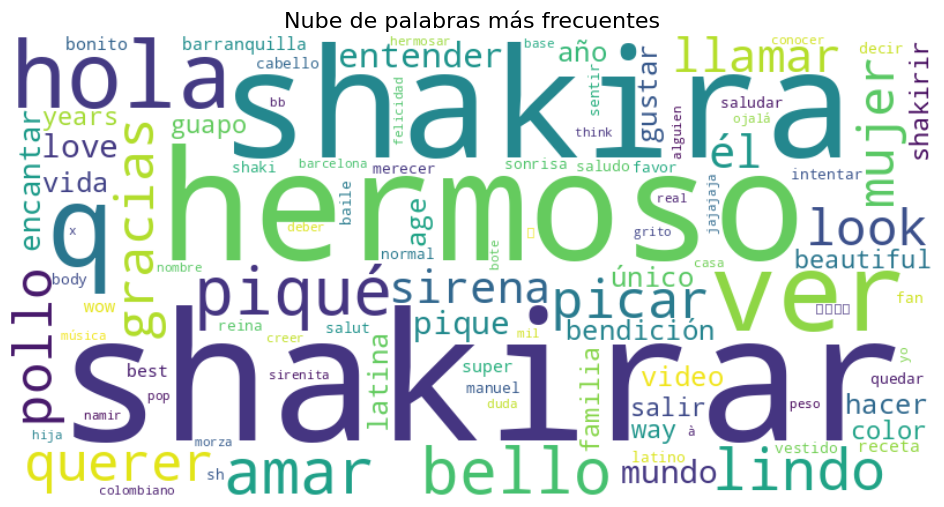

In [ ]:
from wordcloud import WordCloud

# Crear nube con todo el texto procesado
texto_total = " ".join(df["comentario_procesado"].dropna().astype(str))

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=100
).generate(texto_total)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de palabras más frecuentes", fontsize=16)
plt.show()


In [ ]:
from google.colab import files

df_bow.to_csv("bag_of_words_shakira.csv", index=False, encoding="utf-8-sig")
files.download("bag_of_words_shakira.csv")


NameError: name 'files' is not defined

In [ ]:
from google.colab import files

df.to_csv("comentarios_procesados_shakira.csv", index=False, encoding="utf-8-sig")
files.download("comentarios_procesados_shakira.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>